<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_13_FitDistribucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Introducción a la estadística, Ajuste de distribuciones 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

1. Generar N datos asociados a una distribución normal empleando la libreria random de numpy.

2. Construya un histograma con los datos de la distribución

In [ ]:
mu = 0
sigma = 1

N=100000

datos = np.random.normal(mu, sigma, N)

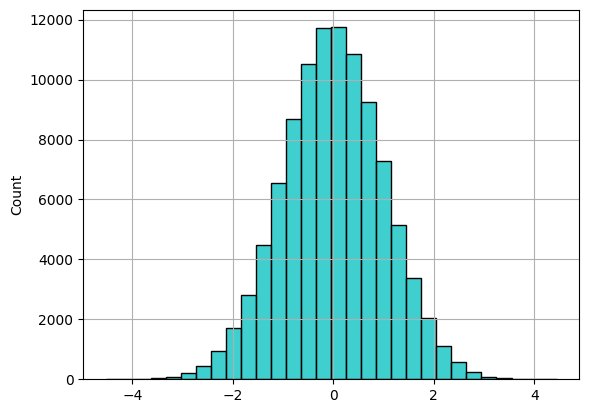

In [ ]:
sns.histplot(datos, bins=30, color='c')
plt.grid()



3. Con la libreria stat de scipy realizar un fit a la distribucion normal que se generó con los números aleatorios, utilizar el metodo fit dentro de la libreria de stat.



La función que representa una función normal es:

\begin{equation}
p(x)= \frac{1}{\sqrt{2\pi\sigma²}}e^{\frac{-(x-\mu)²}{2\sigma²}}
\end{equation}

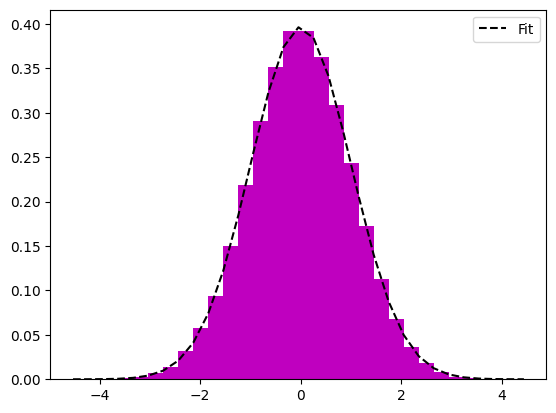

In [ ]:
params = norm.fit(datos)  

count, bins, ignored = plt.hist(datos, 30, density=True, color='m')

plt.plot(bins, 1/(np.sqrt(2 * np.pi*params[1]**2)) *np.exp( - (bins - params[0])**2 / (2 * params[1]**2) ), linestyle='--', color='k', label='Fit')
plt.legend()
plt.show()


4. Cuando no conocemos la distribución de datos, es recomendable buscar la mejor distribucion estadistica posible, supogamos que queremos analizar el mejor fit de multiples  distribuciones estadisticas, asi que podemos emplear la libreria Fitter para buscar la mejor distribución cuando determinados el error cuadratico medio, como sigue: 


```
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria, que podemos emplear para realizar ajustes mas generalizados.

Realizar un fit con la distribucion gamma, lognorm, beta, norm para la distribución de datos estadísticos. Ahora que ya sabes cual es la mejor, emplea la libreria stat para realizar nuevamente el fit, de esta manera puedes usar todos los metodos de la libreria stat.

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=7595d1774c377d698b32663d3578f11e3c4655280b25e660a65037ab12629506
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


Fitting 5 distributions: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


(18891749.969677, 43297.59402004865, -91383.81302312488, 91593.25805196047)

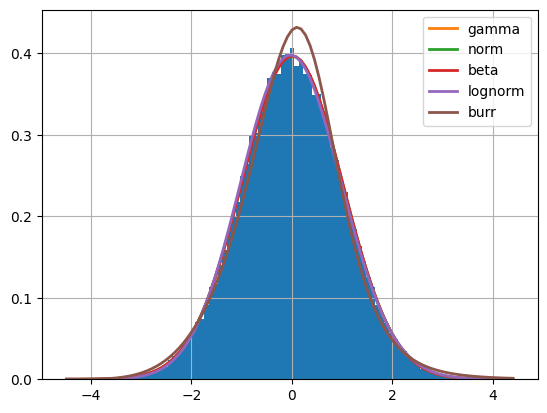

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(datos,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')

# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




5. Ahora que ya sambemos realizar un fit de distribuciones estadístiscas con datos sinténticos, vamos a la práctica de un problema real.

Los archivos pdf, puede ser binarizados, un ejemplo de archivo binario es dado en el siguiente [link](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Actividades_clase/binary.txt).  Analicemos la distribucion estadistica de los datos, de la siguiente manera:

a. Realizar la lectura del archivo binario
 
b. Agrupar los datos del pdf en grupos de 2, 3, 4, 5, 6, 7, 8 bit. Asociar un entero a cada uno de los bit, agrupando de la siguiente forma:

Supongamos que x es el archibo pdf representado de la siguiente forma 

x = "0111001011111101010101010101"

Para la agrupacion de 2, 3, 4, 5, 6, n bit, podemos agrupar los datos de a dos, de forma consecutiva, o en grupos de a 2 sin repetición. 
  1. Ejemplo de  agrupacion sin repeticion de 2 bit  
    - Una posible agrupacion de 2 bit es : {"01","11","10"...}
    - Una posible agrupacion de 3 bit es : {"011","100","10"...}
  
  2. Agrupacion con repetecion de a 2 bit:
    - Una posible agrupacion de 2 bit es : {"01","11","11"...}
    - Una posible agrupacion de 3 bit es : {"011","111","110"...}


Agrupando de cualquiera de las dos formas, podemos generar una lista de números enteros, asociado a cada número binario, y con ello construir un histogramas. 


c. Constriur histogramas para la forma 1 de agrupación, para 2, 3, 4, 5, 6, 7, 8 bit.


d. realizar un fit para cada unas de las distribuciones estadisticas.



Ayuda:

- De la siguiente forma se puede agrupar los datos y asociar el valor entero agrupando de la forma 1. 

```python 
import textwrap

a = "10110101010101"

bin_string = a
bin_string = bin(int(bin_string, 2))[2:]
split = 2
s = textwrap.wrap(bin_string,2)

#Entero ascoiado 
b = int(s[0], 2)


```


- Una forma más avanzada de agrupar los datos con la funcion map, de programacion funcional, puede  es dada a continuación:

```python 
state="111111111"
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 2
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos = ["".join (map (str, i)) for i in s]
```



In [ ]:
#Leemos el archivo

In [ ]:
import requests

# URL del archivo binario
url = "https://raw.githubusercontent.com/hernansalinas/autogrades/main/Actividades_clase/binary.txt"

# Descargar el archivo binario
respuesta = requests.get(url)

# Leer el contenido binario descargado
contenido_binario = respuesta.content

# Imprimir el contenido binario
print(contenido_binario)


b'10010101010000010001000100011000101101001100010010111000110111000011010000101000100101101000011011001111000101110101110000110100001010001100010010000000110000001000000110111101100010011010100000110100001010001111000011110000101111010100000110000101100111011001010111001100100000001100100010000000110000001000000101001000100000001011110101010001111001011100000110010100101111010000110110000101110100011000010110110001101111011001110011111000111110000011010000101001100101011011100110010001101111011000100110101000001101000010100011001000100000001100000010000001101111011000100110101000001101000010100011110000111100001011110100001101101111011101010110111001110100001000000011000100101111010010110110100101100100011100110101101100100000001101000010000000110000001000000101001000100000010111010010111101010100011110010111000001100101001011110101000001100001011001110110010101110011001111100011111000001101000010100110010101101110011001000110111101100010011010100000110100001010001100110010000000110000

In [ ]:
print(type(contenido_binario))


<class 'bytes'>


In [ ]:
import textwrap

a = contenido_binario

bin_string = a
bin_string = bin(int(bin_string, 2))[2:]
split = 2
s = textwrap.wrap(bin_string,2)

# Entero ascoiado 
b = int(s[0], 2)


2

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 2
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_2 = ["".join (map (str, i)) for i in s]

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 3
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_3 = ["".join (map (str, i)) for i in s]

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 4
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_4 = ["".join (map (str, i)) for i in s]

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 5
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_5 = ["".join (map (str, i)) for i in s]

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 6
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_6 = ["".join (map (str, i)) for i in s]

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 7
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_7 = ["".join (map (str, i)) for i in s]

In [ ]:
state = contenido_binario
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 8
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos_8 = ["".join (map (str, i)) for i in s]

Fitting 5 distributions: 100%|██████████| 5/5 [00:57<00:00, 11.42s/it]


Mejor distribución: {'lognorm': {'s': 7.2220255025408715, 'loc': 1615.9999999999995, 'scale': 0.0032982693238160256}}
Parámetros de la distribución beta: (0.8831510470381141, 0.38613000372992545, 1608.8452903193188, 40.82137634734796)


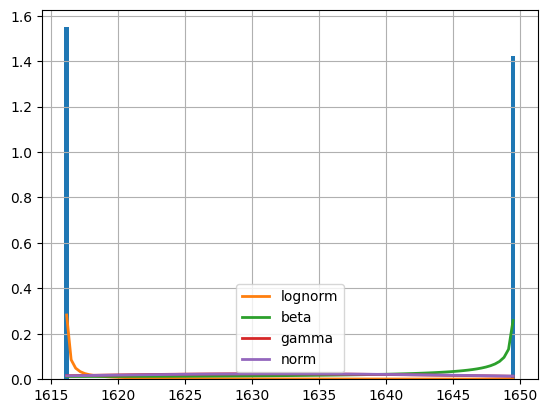

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_2, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Identificar los parámetros de la distribución beta
parametros_beta = f.fitted_param["beta"]
print("Parámetros de la distribución beta:", parametros_beta)


Fitting 5 distributions: 100%|██████████| 5/5 [01:00<00:00, 12.02s/it]


Mejor distribución: {'gamma': {'a': 238.4246581104578, 'loc': 137332.27226620365, 'scale': 108.60441316715657}}
Parámetros de la distribución gamma: (238.4246581104578, 137332.27226620365, 108.60441316715657)
Parámetros de la distribución norm: (163227.10212614248, 1665.1972191053942)


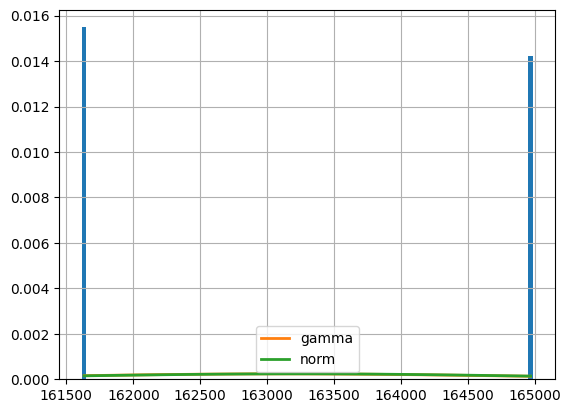

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_3, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Mostrar los parámetros ajustados de todas las distribuciones
for distribucion in f.fitted_param.keys():
    parametros = f.fitted_param[distribucion]
    print("Parámetros de la distribución", distribucion + ":", parametros)


Fitting 5 distributions: 100%|██████████| 5/5 [00:57<00:00, 11.56s/it]


Mejor distribución: {'beta': {'a': 0.769686344304746, 'b': 0.21422440118059757, 'loc': 16065891.093921097, 'scale': 432425.239412237}}
Parámetros de la distribución beta: (0.769686344304746, 0.21422440118059757, 16065891.093921097, 432425.239412237)


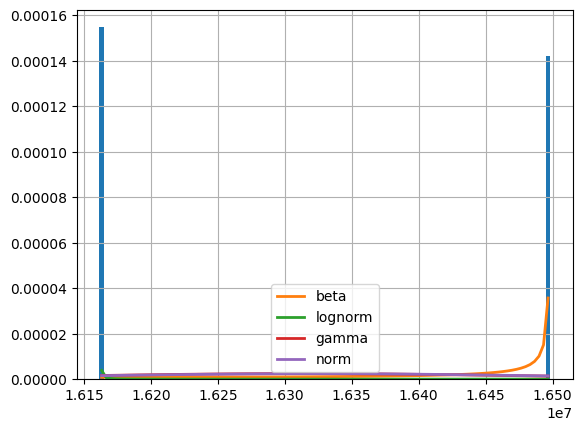

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_4, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Identificar los parámetros de la distribución beta
parametros_beta = f.fitted_param["beta"]
print("Parámetros de la distribución beta:", parametros_beta)


Fitting 5 distributions: 100%|██████████| 5/5 [01:00<00:00, 12.12s/it]


Mejor distribución: {'gamma': {'a': 236.37637183541392, 'loc': 13769879.719804145, 'scale': 10797.37066722161}}
Parámetros de la distribución gamma: (236.37637183541392, 13769879.719804145, 10797.37066722161)
Parámetros de la distribución norm: (16322726.737376196, 166519.7431429886)


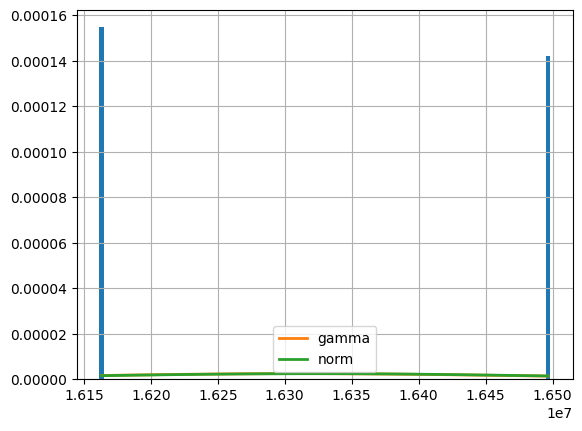

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_4, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Mostrar los parámetros ajustados de todas las distribuciones
for distribucion in f.fitted_param.keys():
    parametros = f.fitted_param[distribucion]
    print("Parámetros de la distribución", distribucion + ":", parametros)


Fitting 5 distributions: 100%|██████████| 5/5 [01:00<00:00, 12.02s/it]


Mejor distribución: {'gamma': {'a': 265.2179887867396, 'loc': 1362000755.8668108, 'scale': 1018826.9004131681}}
Parámetros de la distribución gamma: (265.2179887867396, 1362000755.8668108, 1018826.9004131681)
Parámetros de la distribución norm: (1632272650.018815, 16651972.965325058)


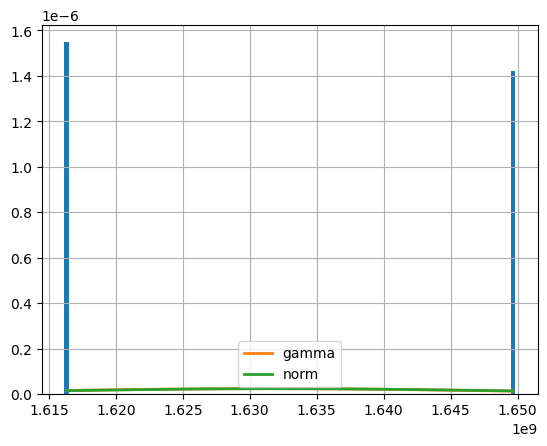

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_5, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Mostrar los parámetros ajustados de todas las distribuciones
for distribucion in f.fitted_param.keys():
    parametros = f.fitted_param[distribucion]
    print("Parámetros de la distribución", distribucion + ":", parametros)


Fitting 5 distributions: 100%|██████████| 5/5 [01:00<00:00, 12.07s/it]


Mejor distribución: {'norm': {'loc': 163227268670.67615, 'scale': 1665197493.625165}}
Parámetros de la distribución norm: (163227268670.67615, 1665197493.625165)


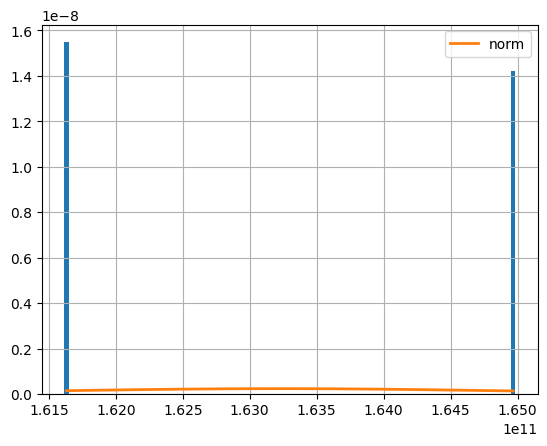

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_6, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Mostrar los parámetros ajustados de todas las distribuciones
for distribucion in f.fitted_param.keys():
    parametros = f.fitted_param[distribucion]
    print("Parámetros de la distribución", distribucion + ":", parametros)


Fitting 5 distributions: 100%|██████████| 5/5 [01:00<00:00, 12.11s/it]


Mejor distribución: {'norm': {'loc': 16322727239989.488, 'scale': 166519761755.7031}}
Parámetros de la distribución norm: (16322727239989.488, 166519761755.7031)


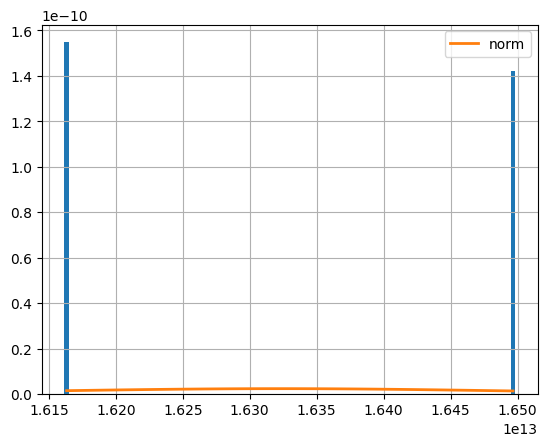

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_7, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Mostrar los parámetros ajustados de todas las distribuciones
for distribucion in f.fitted_param.keys():
    parametros = f.fitted_param[distribucion]
    print("Parámetros de la distribución", distribucion + ":", parametros)

Fitting 5 distributions: 100%|██████████| 5/5 [01:00<00:00, 12.03s/it]


Mejor distribución: {'gamma': {'a': 261.5337234975973, 'loc': 1363634063082084.5, 'scale': 1027005053500.0305}}
Parámetros de la distribución gamma: (261.5337234975973, 1363634063082084.5, 1027005053500.0305)
Parámetros de la distribución norm: (1632272761297349.2, 16651977407419.828)


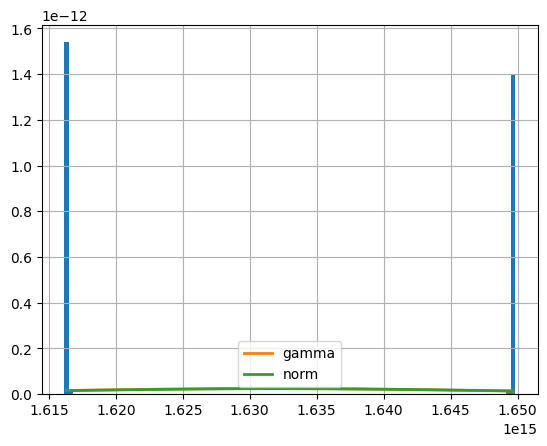

In [ ]:
# Convertir los enteros a valores continuos en el rango de 0 a 1
valores_continuos = np.array(binario_grupos_8, dtype=float) / 3.0  # Cambia el 3.0 por el valor máximo posible

# Ajustar las distribuciones a los datos continuos
f = Fitter(valores_continuos, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el error cuadrático medio
mejor_distribucion = f.get_best(method='sumsquare_error')
print("Mejor distribución:", mejor_distribucion)

# Mostrar los parámetros ajustados de todas las distribuciones
for distribucion in f.fitted_param.keys():
    parametros = f.fitted_param[distribucion]
    print("Parámetros de la distribución", distribucion + ":", parametros)